# ECOSTRESS View of Seattle, WA

From [AppEEARS](https://lpdaacsvc.cr.usgs.gov/appeears), I've downloaded a collection of geotiffs for ECOSTRESS LST for the more [urban counties](https://en.wikipedia.org/wiki/Seattle_metropolitan_area) on the east side of Puget Sound in Washington (Thurston, Pierce, King, and Snohomish counties; covering the Olympia-Tacoma-Seattle-Everett metro area)

In [1]:
import os
import xarray as xr
import rioxarray as rioxr
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, mapping
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Set the path to the top level directory where all our ECOSTRESS images are, their file extension, and product name.

In [2]:
eco_tiff_path = '../data/'
ext = '.tif'
product = 'SDS_LST_doy'

Get a list of all our ECOSTRESS LST files

In [3]:
# get list of all tif files
file_list = []
filename_list = []
datetime_list = []
for root, dirs, files in os.walk(eco_tiff_path):
    for file in files:
        if file.endswith(ext):
            if product in file:
                file_list.append( os.path.join(root, file) ) 
                filename_list.append( file.split('/')[-1] )
                datetime_string = file.split('doy')[-1][0:13]
                datetime_list.append( pd.Timestamp(dt.datetime.strptime(datetime_string, '%Y%j%H%M%S')) )
                
file_list = pd.DataFrame({'filepath': file_list, 
                          'filename': filename_list,
                          'datetime': datetime_list})

View the file list:

In [4]:
file_list

,filepath,filename,datetime
0,../data/ECO2LSTE.001_SDS_LST_doy2020223203550_...,ECO2LSTE.001_SDS_LST_doy2020223203550_aid0001.tif,2020-08-10 20:35:50
1,../data/ECO2LSTE.001_SDS_LST_doy2020223203642_...,ECO2LSTE.001_SDS_LST_doy2020223203642_aid0001.tif,2020-08-10 20:36:42
2,../data/ECO2LSTE.001_SDS_LST_doy2020224194813_...,ECO2LSTE.001_SDS_LST_doy2020224194813_aid0001.tif,2020-08-11 19:48:13
3,../data/ECO2LSTE.001_SDS_LST_doy2020224194905_...,ECO2LSTE.001_SDS_LST_doy2020224194905_aid0001.tif,2020-08-11 19:49:05
4,../data/ECO2LSTE.001_SDS_LST_doy2020225190035_...,ECO2LSTE.001_SDS_LST_doy2020225190035_aid0001.tif,2020-08-12 19:00:35
5,../data/ECO2LSTE.001_SDS_LST_doy2020225190127_...,ECO2LSTE.001_SDS_LST_doy2020225190127_aid0001.tif,2020-08-12 19:01:27
6,../data/ECO2LSTE.001_SDS_LST_doy2020226181314_...,ECO2LSTE.001_SDS_LST_doy2020226181314_aid0001.tif,2020-08-13 18:13:14
7,../data/ECO2LSTE.001_SDS_LST_doy2020226230423_...,ECO2LSTE.001_SDS_LST_doy2020226230423_aid0001.tif,2020-08-13 23:04:23
8,../data/ECO2LSTE.001_SDS_LST_doy2020227190213_...,ECO2LSTE.001_SDS_LST_doy2020227190213_aid0001.tif,2020-08-14 19:02:13
9,../data/ECO2LSTE.001_SDS_LST_doy2020227190305_...,ECO2LSTE.001_SDS_LST_doy2020227190305_aid0001.tif,2020-08-14 19:03:05


Open one of our ECOSTRESS images, for Aug. 16, 2020 ([day of year](https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html) 229), which was a record-breaking temperature day.
* https://www.seattleweatherblog.com/temperature-stats/
* https://twitter.com/NWSSeattle/status/1295171526677811201
* https://www.wunderground.com/calendar/us/wa/seattle/KSEA/date/2020-8

We can see in the list above that we want file number 12 (file number 13 is the next image but it misses Seattle)

In [5]:
i=12

Open ecostress files(s) with xarray

In [6]:
eco_lst = xr.open_rasterio(file_list.filepath[i])

Open our [Seattle neighborhoods shapefiles](https://data-seattlecitygis.opendata.arcgis.com/datasets/city-clerk-neighborhoods) (downloaded from: [Seattle GeoData](https://data-seattlecitygis.opendata.arcgis.com/)):

In [7]:
seattle = gpd.read_file('zip://../shapefiles/City_Clerk_Neighborhoods-shp.zip')
seattle.head(3)

,OBJECTID,PERIMETER,S_HOOD,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,AREA,HOODS_,HOODS_ID,SHAPE_Leng,SHAPE_Area,geometry
0,1,617.843,OOO,None,0,0,0,3588.443,2,0,617.842614,3588.442385,"POLYGON ((-122.27398 47.69523, -122.27409 47.6..."
1,2,733.568,OOO,None,0,0,0,22294.777,3,0,733.568416,22294.781706,"POLYGON ((-122.28756 47.64523, -122.28754 47.6..."
2,3,4088.442,OOO,None,0,0,0,56695.367,5,0,4088.441739,56695.357490,"POLYGON ((-122.39529 47.66514, -122.39520 47.6..."


Make sure we're in the same coordinate reference system (crs):

In [8]:
seattle = seattle.to_crs(eco_lst.crs)

In [9]:
print('ECOSTRESS CRS: {}'.format(eco_lst.crs))
print('Shapefile CRS: {}'.format(seattle.crs))

ECOSTRESS CRS: +init=epsg:4326
Shapefile CRS: +init=epsg:4326


Merge all the neighborhoods into one Seattle shapefile

In [10]:
# Make a field we can use to merge them all by
seattle = seattle.assign(city='Seattle')
seattle_all = seattle.dissolve(by='city', aggfunc='sum')

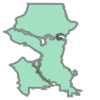

In [11]:
seattle_all.geometry[0]

Scale the temperature values using the "scale_factor" in the ECOSTRESS metadata:

In [12]:
scaled_eco_lst = eco_lst * float(eco_lst.attrs['scale_factor'])

Plot our ECOSTRESS image and Seattle neighborhoods

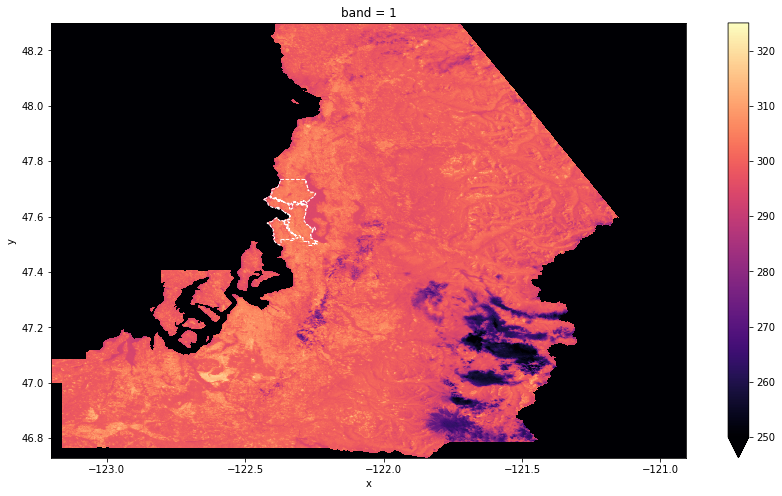

In [13]:
fig, ax = plt.subplots(figsize=(15,8))

scaled_eco_lst.plot(x='x', y='y', ax=ax, vmin=250, vmax=325, cmap='magma')

seattle_all.plot(ax=ax, edgecolor='white', linestyle='--', facecolor='none');

ax.set_aspect(1)

---

Now let's look at the neighborhood level.

In [14]:
# Aaggregate by the larger neighborhood boundaries:
seattle = seattle.dissolve(by='L_HOOD', aggfunc='sum')

Mask using the neighborhoods shapefile

In [15]:
seattle_all_lst = eco_lst.rio.clip(seattle_all.geometry.apply(mapping),crs=seattle_all.crs)

# switch our zero values to nan values
seattle_all_lst = seattle_all_lst.where(seattle_all_lst > 0)

Scale our clipped dataset and convert from Kelvin to Celsius

In [16]:
# scale our clipped dataset and convert from K to C
scaled_seattle_lst = ( seattle_all_lst * float(eco_lst.attrs['scale_factor']) ) - 273.15

Compute some zonal statistics

In [17]:
# Compute zonal statistics
# Remove NaN pixel values
values = scaled_seattle_lst.values.flatten()
values = values[~np.isnan(values)]

# Print zonal statistics
summary_stats = 'Temperature Histogram\nMean: {}, Median: {}\nMax: {}, Min: {}, Standard Deviation: {}' \
                .format(np.round(values.mean(),1),
                np.round(np.median(values),1),
                np.round(values.max(),1),
                np.round(values.min(),1),
                np.round(values.std(),1))

print(summary_stats)

Temperature Histogram
Mean: 30.0, Median: 30.5
Max: 41.2, Min: 16.9, Standard Deviation: 2.5


Plot the clipped ECOSTRESS image and histogram with summary statistics

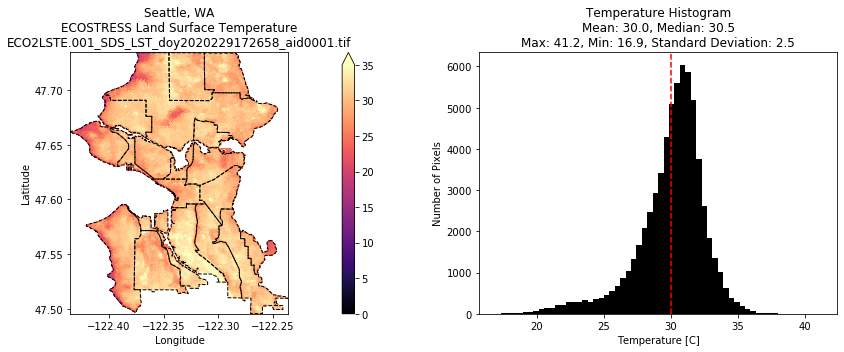

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), gridspec_kw={'width_ratios': [3, 1]})

# image
scaled_seattle_lst.plot(x='x', y='y', ax=ax1, vmin=0, vmax=35, cmap='magma')
seattle.plot(ax=ax1, edgecolor='black', linestyle='--', facecolor='none');
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')
ax1.set_title('Seattle, WA\nECOSTRESS Land Surface Temperature\n{}'.format(file_list.filename[i]))
ax1.set_aspect(1)

# histogram
ax2.hist(values, bins=60, facecolor='k');
ax2.axvline(x=values.mean(), c='r', linestyle='--')
ax2.set_title(summary_stats)
ax2.set_ylabel('Number of Pixels')
ax2.set_xlabel('Temperature [C]')

plt.tight_layout()

---

Now loop through and look at each neighborhood individually:

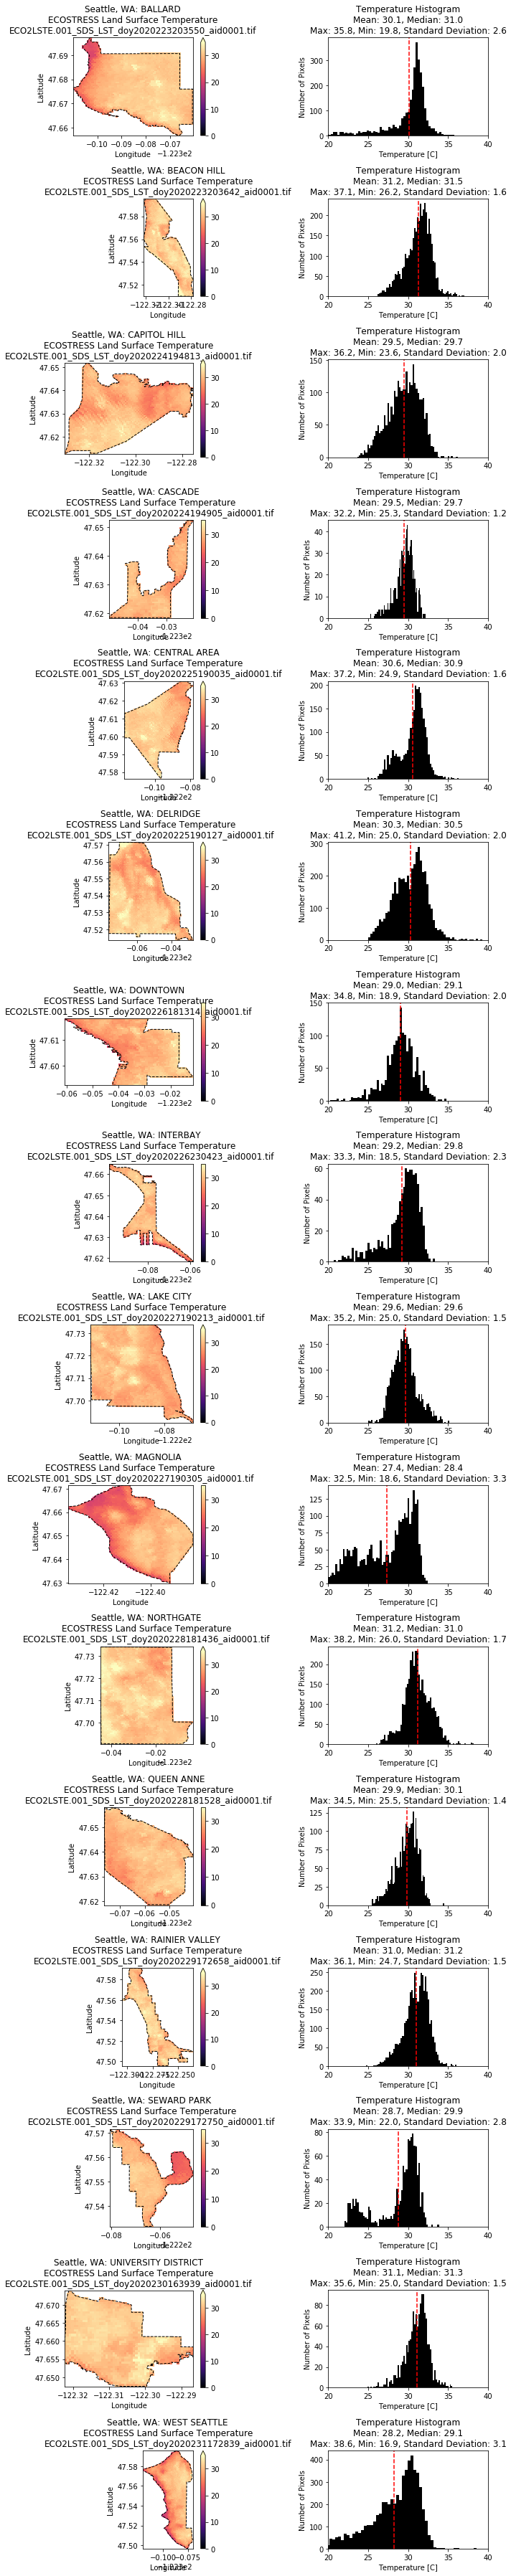

In [19]:
# Set up the plot for clipped ECOSTRESS images and histograms with summary statistics
fig, ax = plt.subplots(nrows=16, ncols=2, figsize=(10,50))

# counter for plots
i = 0
for index, neighborhood in seattle.iterrows():
    # skip areas not in a designated neighborhood
    if neighborhood.name != 'NO BROADER TERM':
        
        
        # Mask using the neighborhood geometry
        neighborhood_geom = gpd.GeoSeries(neighborhood.geometry) # we need this as a geoseries
        this_neighborhood_lst = eco_lst.rio.clip(neighborhood_geom.apply(mapping),crs=seattle.crs)
    
        # Switch our zero values to nan values
        this_neighborhood_lst = this_neighborhood_lst.where(this_neighborhood_lst > 0)
        
        # Scale our clipped dataset and convert from Kelvin to Celsius
        this_neighborhood_lst = ( this_neighborhood_lst * float(eco_lst.attrs['scale_factor']) ) - 273.15
        
        # Compute some zonal statistics
        # Remove NaN pixel values
        values = this_neighborhood_lst.values.flatten()
        values = values[~np.isnan(values)]
        
        # Print zonal statistics
        summary_stats = 'Temperature Histogram\nMean: {}, Median: {}\nMax: {}, Min: {}, Standard Deviation: {}' \
                        .format(np.round(values.mean(),1),
                        np.round(np.median(values),1),
                        np.round(values.max(),1),
                        np.round(values.min(),1),
                        np.round(values.std(),1))
    
        # image
        this_neighborhood_lst.plot(x='x', y='y', ax=ax[i,0], vmin=0, vmax=35, cmap='magma')
        neighborhood_geom.plot(ax=ax[i,0], edgecolor='black', linestyle='--', facecolor='none');
        ax[i,0].set_ylabel('Latitude')
        ax[i,0].set_xlabel('Longitude')
        ax[i,0].set_title('Seattle, WA: {}\nECOSTRESS Land Surface Temperature\n{}'.format(neighborhood.name, file_list.filename[i]))
        ax[i,0].set_aspect(1)
        
        # histogram
        ax[i,1].hist(values, bins=60, facecolor='k');
        ax[i,1].axvline(x=values.mean(), c='r', linestyle='--')
        ax[i,1].set_title(summary_stats)
        ax[i,1].set_ylabel('Number of Pixels')
        ax[i,1].set_xlabel('Temperature [C]')
        ax[i,1].set_xlim((20,40))
        
        plt.tight_layout()
        i+=1